In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.image as mping

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\derek\AppData\Local\Temp\ipykernel_17272\4243113477.py:1: SyntaxWarning: invalid escape sequence '\L'
  image = mping.imread('images\L13_F1.png')


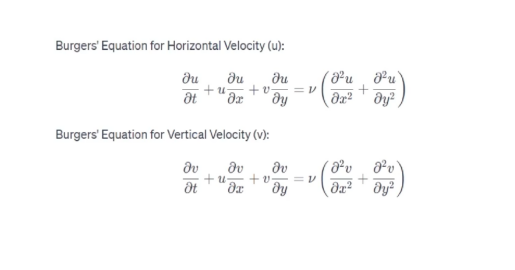

In [2]:
image = mping.imread('images\L13_F1.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
nt = 500
nx = 51
ny = 51

nu = 0.1
dt = 0.001

dx = 2/(nx-1)
dy = 2/(ny-1)

x = np.linspace(0,2,nx) #domain 
y = np.linspace(0,2,ny) #domain 

In [4]:
# need to make a grid

comb = np.zeros((ny,nx))
comb.shape # now have a mesh 51 by 51 grid 

(51, 51)

In [5]:
# current time step
u = np.zeros((ny,nx)) 
v = np.zeros((ny,nx))

# previous time step 
un = np.zeros((ny,nx))
vn = np.zeros((ny,nx))

# next time step where we save solutions
uf = np.zeros((nt,ny,nx))
vf = np.zeros((nt,ny,nx))

In [6]:
uf.shape # used to store calculations 

(500, 51, 51)

- need initial condition

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\derek\AppData\Local\Temp\ipykernel_17272\1757212019.py:1: SyntaxWarning: invalid escape sequence '\L'
  image = mping.imread('images\L13_F2.png')


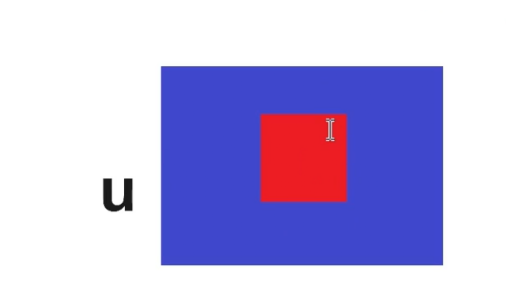

In [7]:
image = mping.imread('images\L13_F2.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
# initial condition 
# current time step
u = np.ones((ny,nx)) 
v = np.ones((ny,nx))
# next time step where we save solutions
uf = np.ones((nt,ny,nx))
vf = np.ones((nt,ny,nx))


In [9]:
# getting coordinates of the red square 
u[int(0.75/dy):int(1.25/dy+1),int(0.75/dy):int(1.25/dy+1)] = 5
v[int(0.75/dy):int(1.25/dy+1),int(0.75/dy):int(1.25/dy+1)] = 5

uf[0,int(0.75/dy):int(1.25/dy+1),int(0.75/dy):int(1.25/dy+1)] = 5
vf[0,int(0.75/dy):int(1.25/dy+1),int(0.75/dy):int(1.25/dy+1)] = 5

In [10]:
X, Y = np.meshgrid(x,y)

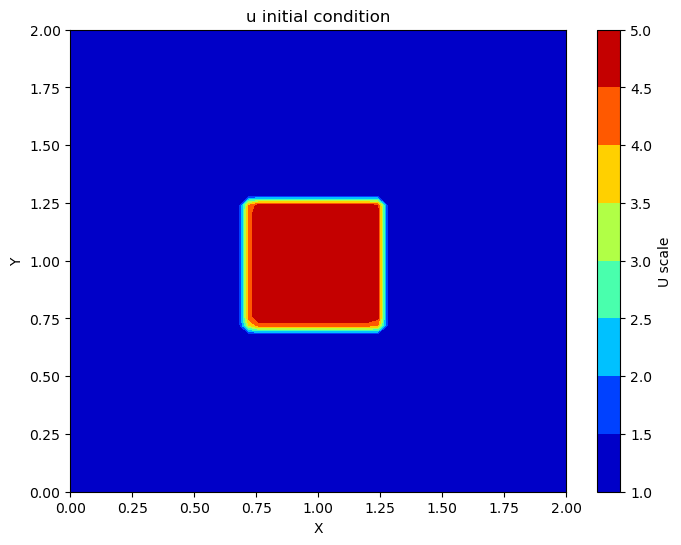

In [17]:
plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,vf[0,:], cmap='jet')
plt.title('u initial condition')
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar(contour)
colorbar.set_label('U scale')
plt.show()

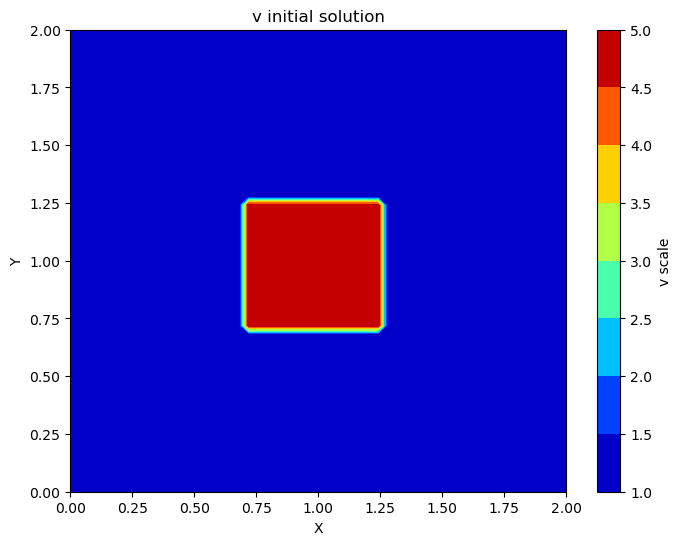

In [12]:
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,v[:], cmap='jet')
plt.title('v initial solution')
plt.xlabel('X')
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

In [13]:
# need to update the solution at every time step 

for n in range(nt): # need to loop through the time 
    un = u.copy() # making copy of last time step 
    vn = v.copy() # making copy of last time step 
    for i in range(1, nx-1): # start from 1 to preserve point at 0 where point at 0 is the initial/boundary condition 
        for j in range(1,ny-1): # start from 1 to preserve point at 0 where point at 0 is the initial/boundary condition 
            # next two lines are the diff eqn discreitized 
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            # storing the calculation 
            uf[n,i,j] = u[i,j] 
            vf[n,i,j] = v[i,j]
    # updating the boundary condition 
    u[:,0 ] = 1 # u at begininng 
    u[:,-1] = 1 # u at last point
    u[0,: ] = 1 # u 
    u[-1,:] = 1
    v[:,0 ] = 1
    v[:,-1] = 1
    v[0,: ] = 1
    v[-1,:] = 1     

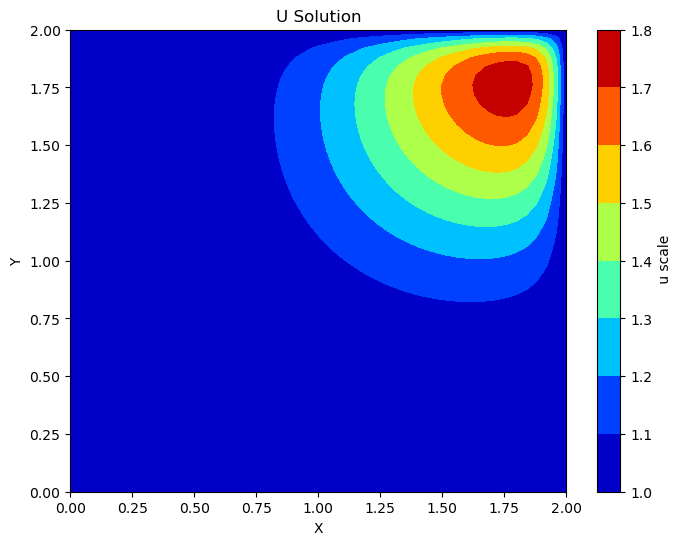

In [14]:
# check the solution 

X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title('U Solution')
plt.xlabel('X')
plt.ylabel('Y')
colorbar = plt.colorbar(contour)
colorbar.set_label(" u scale")

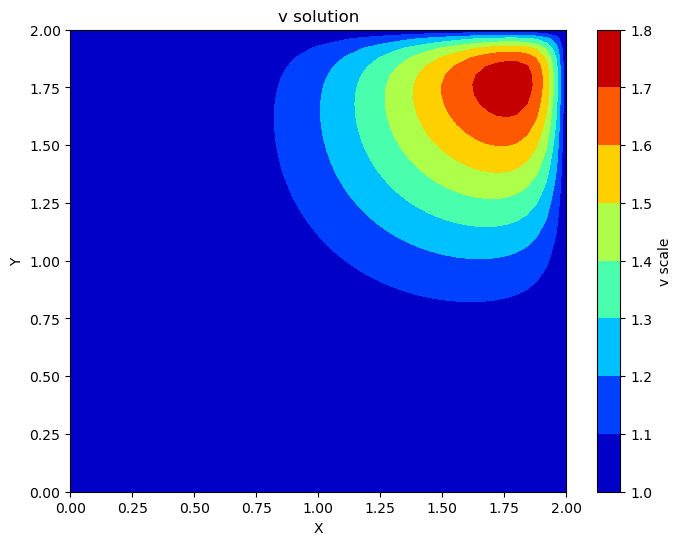

In [15]:
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,v[:], cmap='jet')
plt.title('v solution')
plt.xlabel('X')
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

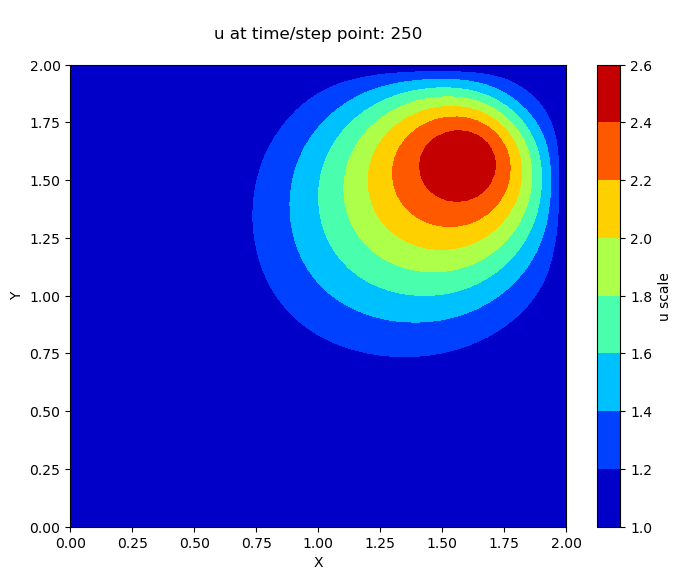

In [16]:
X,Y = np.meshgrid(x,y)

time = 250
u = uf[time,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title(f'\nu at time/step point: {time}\n')
plt.xlabel('X')
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")